In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('math.csv')

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[(df['dynamic'] == False) & (df['busy'] == 0)]

df

,dynamic,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,False,0,1,7.201206,0.059153,0.059165,1.000000,7.201206,121.739298
1,False,0,2,3.432752,0.029399,0.029102,0.989902,3.398088,116.762897
2,False,0,3,3.737186,0.029368,0.019441,0.661965,2.473887,127.253380
3,False,0,4,2.291222,0.014902,0.014714,0.987394,2.262339,153.752656
4,False,0,5,1.717868,0.011860,0.011685,0.985199,1.692443,144.841886
...,...,...,...,...,...,...,...,...,...
571,True,32,28,4.078969,0.017525,0.002336,0.133271,0.543608,232.748626
572,True,32,29,4.359019,0.018606,0.002203,0.118421,0.516199,234.279523
573,True,32,30,3.755338,0.015502,0.002170,0.139972,0.525643,242.248620
574,True,32,31,4.358356,0.018482,0.002074,0.112241,0.489187,235.810280


In [13]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[(df_speedup['dynamic'] == False) & (df_speedup['busy'] == 0)]

df_speedup

,dynamic,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,False,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,False,0,0.500000,2.097794,2.012041,2.032982,1.010201,2.119193,1.042620
2,False,0,0.333333,1.926906,2.014183,3.043357,1.510654,2.910887,0.956668
3,False,0,0.250000,3.142954,3.969446,4.020947,1.012767,3.183080,0.791787
4,False,0,0.200000,4.191943,4.987452,5.063415,1.015023,4.254919,0.840498
...,...,...,...,...,...,...,...,...,...
571,True,32,0.035714,1.765448,3.375291,25.331715,7.503511,13.247056,0.523051
572,True,32,0.034483,1.652024,3.179216,26.852252,8.444459,13.950452,0.519633
573,True,32,0.033333,1.917592,3.815810,27.266769,7.144274,13.699801,0.502539
574,True,32,0.032258,1.652276,3.200475,28.520122,8.909392,14.720770,0.516260


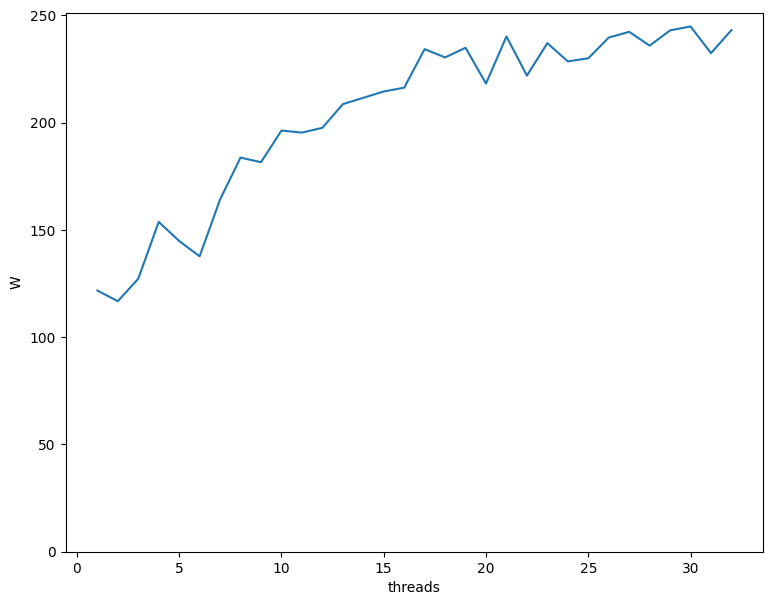

In [14]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

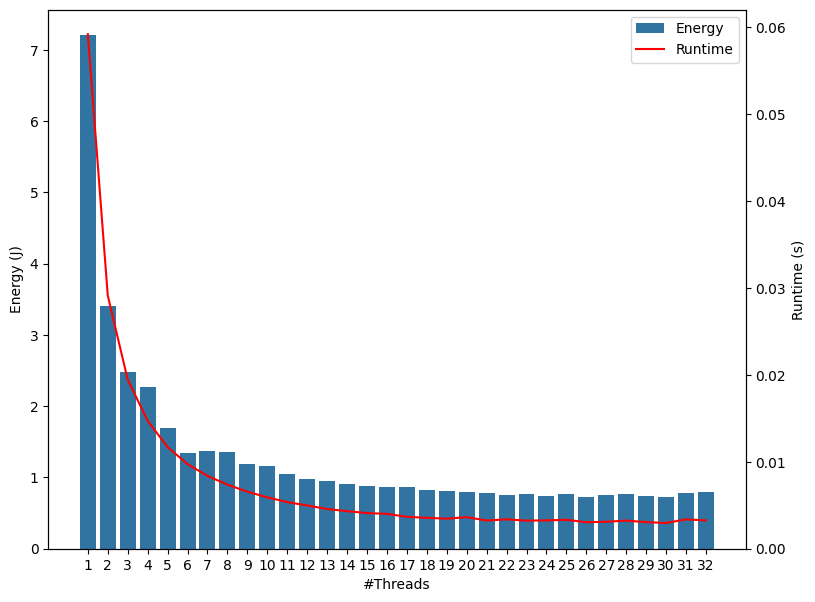

In [15]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

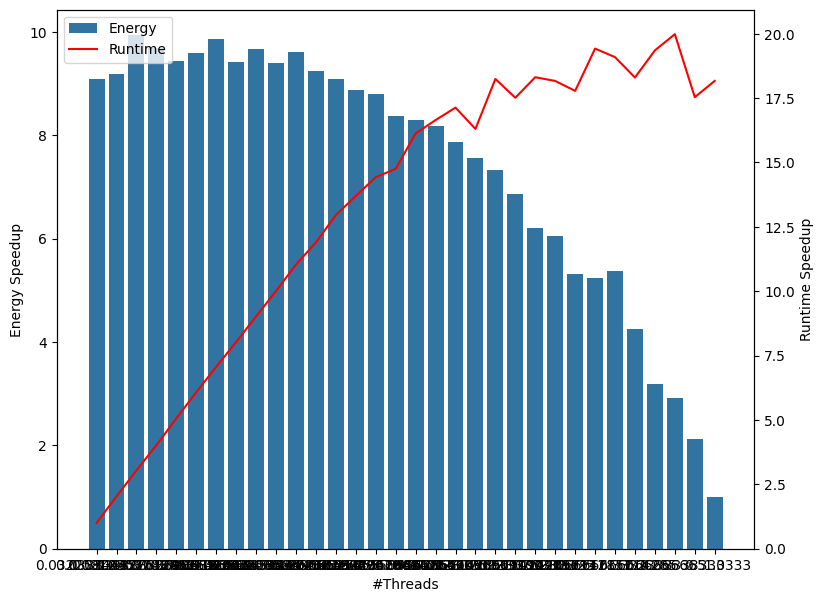

In [21]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [22]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 18 	 0.98246063
4 	 19 	 0.95090829
8 	 18 	 0.94792647
12 	 18 	 1.01120643
16 	 16 	 0.93696176
20 	 13 	 1.19005555
24 	 8 	 1.63054901
28 	 4 	 3.10047294
32 	 30 	 3.13703413


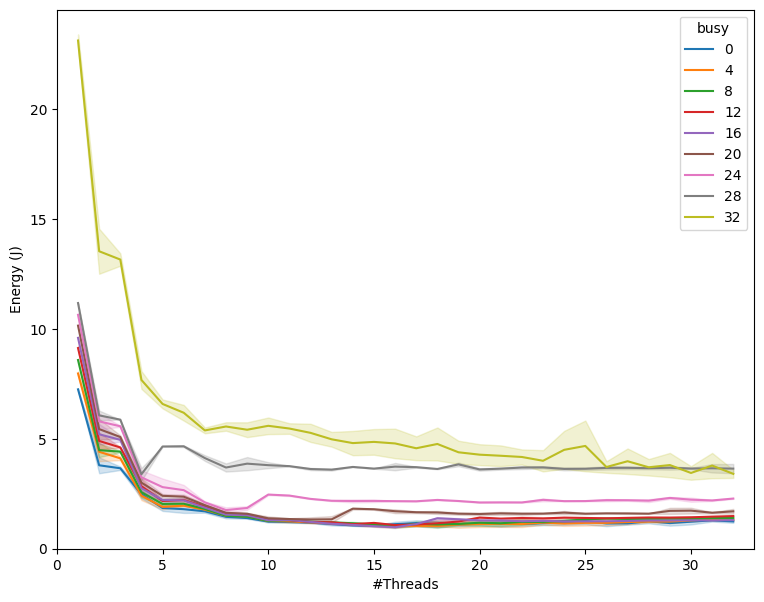

In [23]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

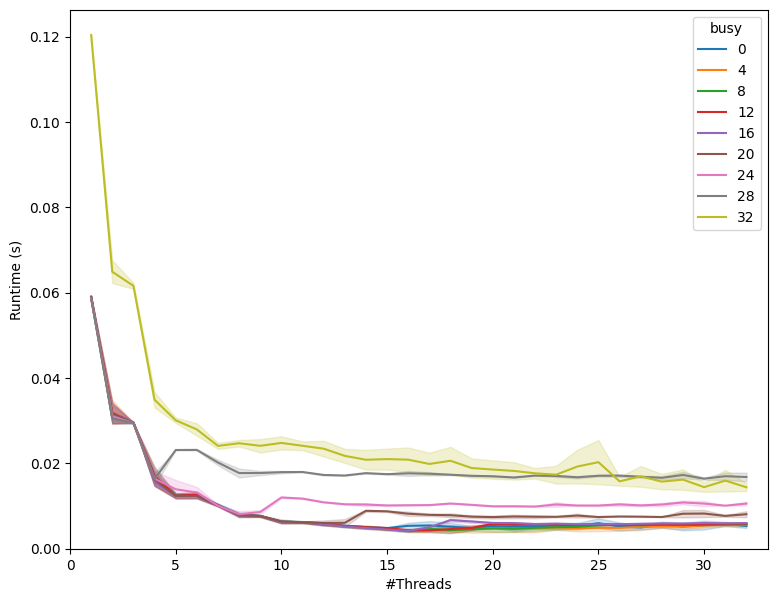

In [24]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()